# Company bankruptcy prediction

### What should be done in the project?
In summary, in this second project you will:
1. [DONE] Select a non-trivial dataset for a classification task (more than 20
columns, more than 1000 examples and, preferable, with missing, noisy or
heterogeneous data).
2. [IN-PROCESS] Do the necessary pre-processing for you data. Also, describe and justify
it in the documentation.
    - Classify variables
3. [TO BE DONE] Apply the methods explained in theory lectures to your dataset. If the
algorithm requires it, find the best parameters for the algorithm. Tuning
of parameters has to be done in a meaningful way. An explanation of the
procedure followed and parameters tested should appear in the documen-
tation.
    - Methods are Nearest Neighbors and Naive Bayes.
4. [TO BE DONE] Try to interpret the models returned by the algorithms, specially in the
case of decision trees.
5. [TO BE DONE] Evaluate and compare different methods applied.
6. [TO BE DONE] Discuss why you think that one method works better than another in your
dataset.
Of course, for the second project you can apply, if necessary, any technique
learned in the first part of the course.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.precision", 3)

sns.set_style("dark")

### Rename of column names

In [3]:
df = pd.read_csv("american_bankruptcy.csv")

dict = {
    "company_name": "Company name",
    "status_label": "Status",
    "year": "Year",
    "X1": "Current assets",
    "X2": "Cost goods sold",
    "X3": "DEP and AMO",
    "X4": "EBITDA",
    "X5": "Inventory",
    "X6": "Net income",
    "X7": "Total Receivables",
    "X8": "Market value",
    "X9": "Net sales",
    "X10": "Total assets",
    "X11": "Long-term debt",
    "X12": "EBIT",
    "X13": "Gross Profit",
    "X14": "Current Liabilities ",
    "X15": "Retained Earnings",
    "X16": "Total Revenue",
    "X17": "Total Liabilities",
    "X18": "Operating Expenses",
}


df = df.rename(columns=dict) #.sample(1000)
df.head()

,Company name,Status,Year,Current assets,Cost goods sold,DEP and AMO,EBITDA,Inventory,Net income,Total Receivables,Market value,Net sales,Total assets,Long-term debt,EBIT,Gross Profit,Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Operating Expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.752,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.118,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.593,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.329,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.907,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [4]:
df.describe()

,Year,Current assets,Cost goods sold,DEP and AMO,EBITDA,Inventory,Net income,Total Receivables,Market value,Net sales,Total assets,Long-term debt,EBIT,Gross Profit,Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Operating Expenses
count,78682.000,78682.000,78682.000,78682.000,78682.000,78682.000,78682.000,78682.000,7.868e+04,78682.000,78682.000,78682.000,78682.000,78682.000,78682.000,78682.000,78682.000,78682.000,78682.000
mean,2007.506,880.362,1594.529,121.234,376.759,201.606,129.382,286.833,3.414e+03,2364.020,2867.111,722.484,255.525,769.491,610.072,532.467,2364.020,1773.564,1987.260
std,5.743,3928.565,8930.485,652.377,2012.023,1060.766,1265.532,1335.979,1.841e+04,11950.069,12917.944,3242.171,1494.644,3774.703,2938.387,6369.159,11950.069,8053.685,10419.629
min,1999.000,-7.760,-366.645,0.000,-21913.000,0.000,-98696.000,-0.006,1.000e-04,-1964.999,0.001,-0.023,-25913.000,-21536.000,0.001,-102362.000,-1964.999,0.001,-317.197
25%,2002.000,18.924,17.038,1.192,-0.811,0.000,-7.416,3.281,3.498e+01,27.548,37.364,0.000,-2.787,8.521,8.889,-68.283,27.548,13.486,32.873
50%,2007.000,100.450,103.661,7.929,15.035,7.023,1.616,22.820,2.275e+02,186.599,213.203,7.594,6.518,63.581,43.333,-1.131,186.599,81.988,168.912
75%,2012.000,431.527,634.548,47.972,139.655,74.747,40.144,131.581,1.245e+03,1046.402,1171.365,248.761,87.599,344.074,222.817,146.070,1046.402,629.975,875.522
max,2018.000,169662.000,374623.000,28430.000,81730.000,62567.000,104821.000,65812.000,1.073e+06,511729.000,531864.000,166250.000,71230.000,137106.000,116866.000,402089.000,511729.000,337980.000,481580.000


### Check for missing values

In [5]:
df.isna().sum()

Company name            0
Status                  0
Year                    0
Current assets          0
Cost goods sold         0
DEP and AMO             0
EBITDA                  0
Inventory               0
Net income              0
Total Receivables       0
Market value            0
Net sales               0
Total assets            0
Long-term debt          0
EBIT                    0
Gross Profit            0
Current Liabilities     0
Retained Earnings       0
Total Revenue           0
Total Liabilities       0
Operating Expenses      0
dtype: int64

In [6]:
df.min()

Company name                 C_1
Status                     alive
Year                        1999
Current assets             -7.76
Cost goods sold         -366.645
DEP and AMO                  0.0
EBITDA                  -21913.0
Inventory                    0.0
Net income              -98696.0
Total Receivables         -0.006
Market value                 0.0
Net sales              -1964.999
Total assets               0.001
Long-term debt            -0.023
EBIT                    -25913.0
Gross Profit            -21536.0
Current Liabilities        0.001
Retained Earnings      -102362.0
Total Revenue          -1964.999
Total Liabilities          0.001
Operating Expenses      -317.197
dtype: object

### Univariate analysis

In [7]:
df2 = df.sample(1000)

fig, axes = plt.subplots(7,3,figsize=(10,20))

for i, c in enumerate(df2.columns):
    ax = axes.reshape(-1)[i]
    if df2[c].dtype.kind == "object":
        a = sns.countplot(x=c,data=df2,ax=ax)
    else:
        b = sns.histplot(x=c,data=df2,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x749bfb6abb50> (for post_execute):


KeyboardInterrupt: 

### Bivariate analysis

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Current assets', ylabel='Year'>,
        <Axes: xlabel='Cost goods sold', ylabel='Year'>,
        <Axes: xlabel='DEP and AMO', ylabel='Year'>,
        <Axes: xlabel='EBITDA', ylabel='Year'>,
        <Axes: xlabel='Inventory', ylabel='Year'>,
        <Axes: xlabel='Net income', ylabel='Year'>,
        <Axes: xlabel='Total Receivables', ylabel='Year'>,
        <Axes: xlabel='Market value', ylabel='Year'>,
        <Axes: xlabel='Net sales', ylabel='Year'>,
        <Axes: xlabel='Total assets', ylabel='Year'>,
        <Axes: xlabel='Long-term debt', ylabel='Year'>,
        <Axes: xlabel='EBIT', ylabel='Year'>,
        <Axes: xlabel='Gross Profit', ylabel='Year'>,
        <Axes: xlabel='Current Liabilities ', ylabel='Year'>,
        <Axes: xlabel='Retained Earnings', ylabel='Year'>,
        <Axes: xlabel='Total Revenue', ylabel='Year'>,
        <Axes: xlabel='Total Liabilities', ylabel='Year'>,
        <Axes: xlabel='Opera

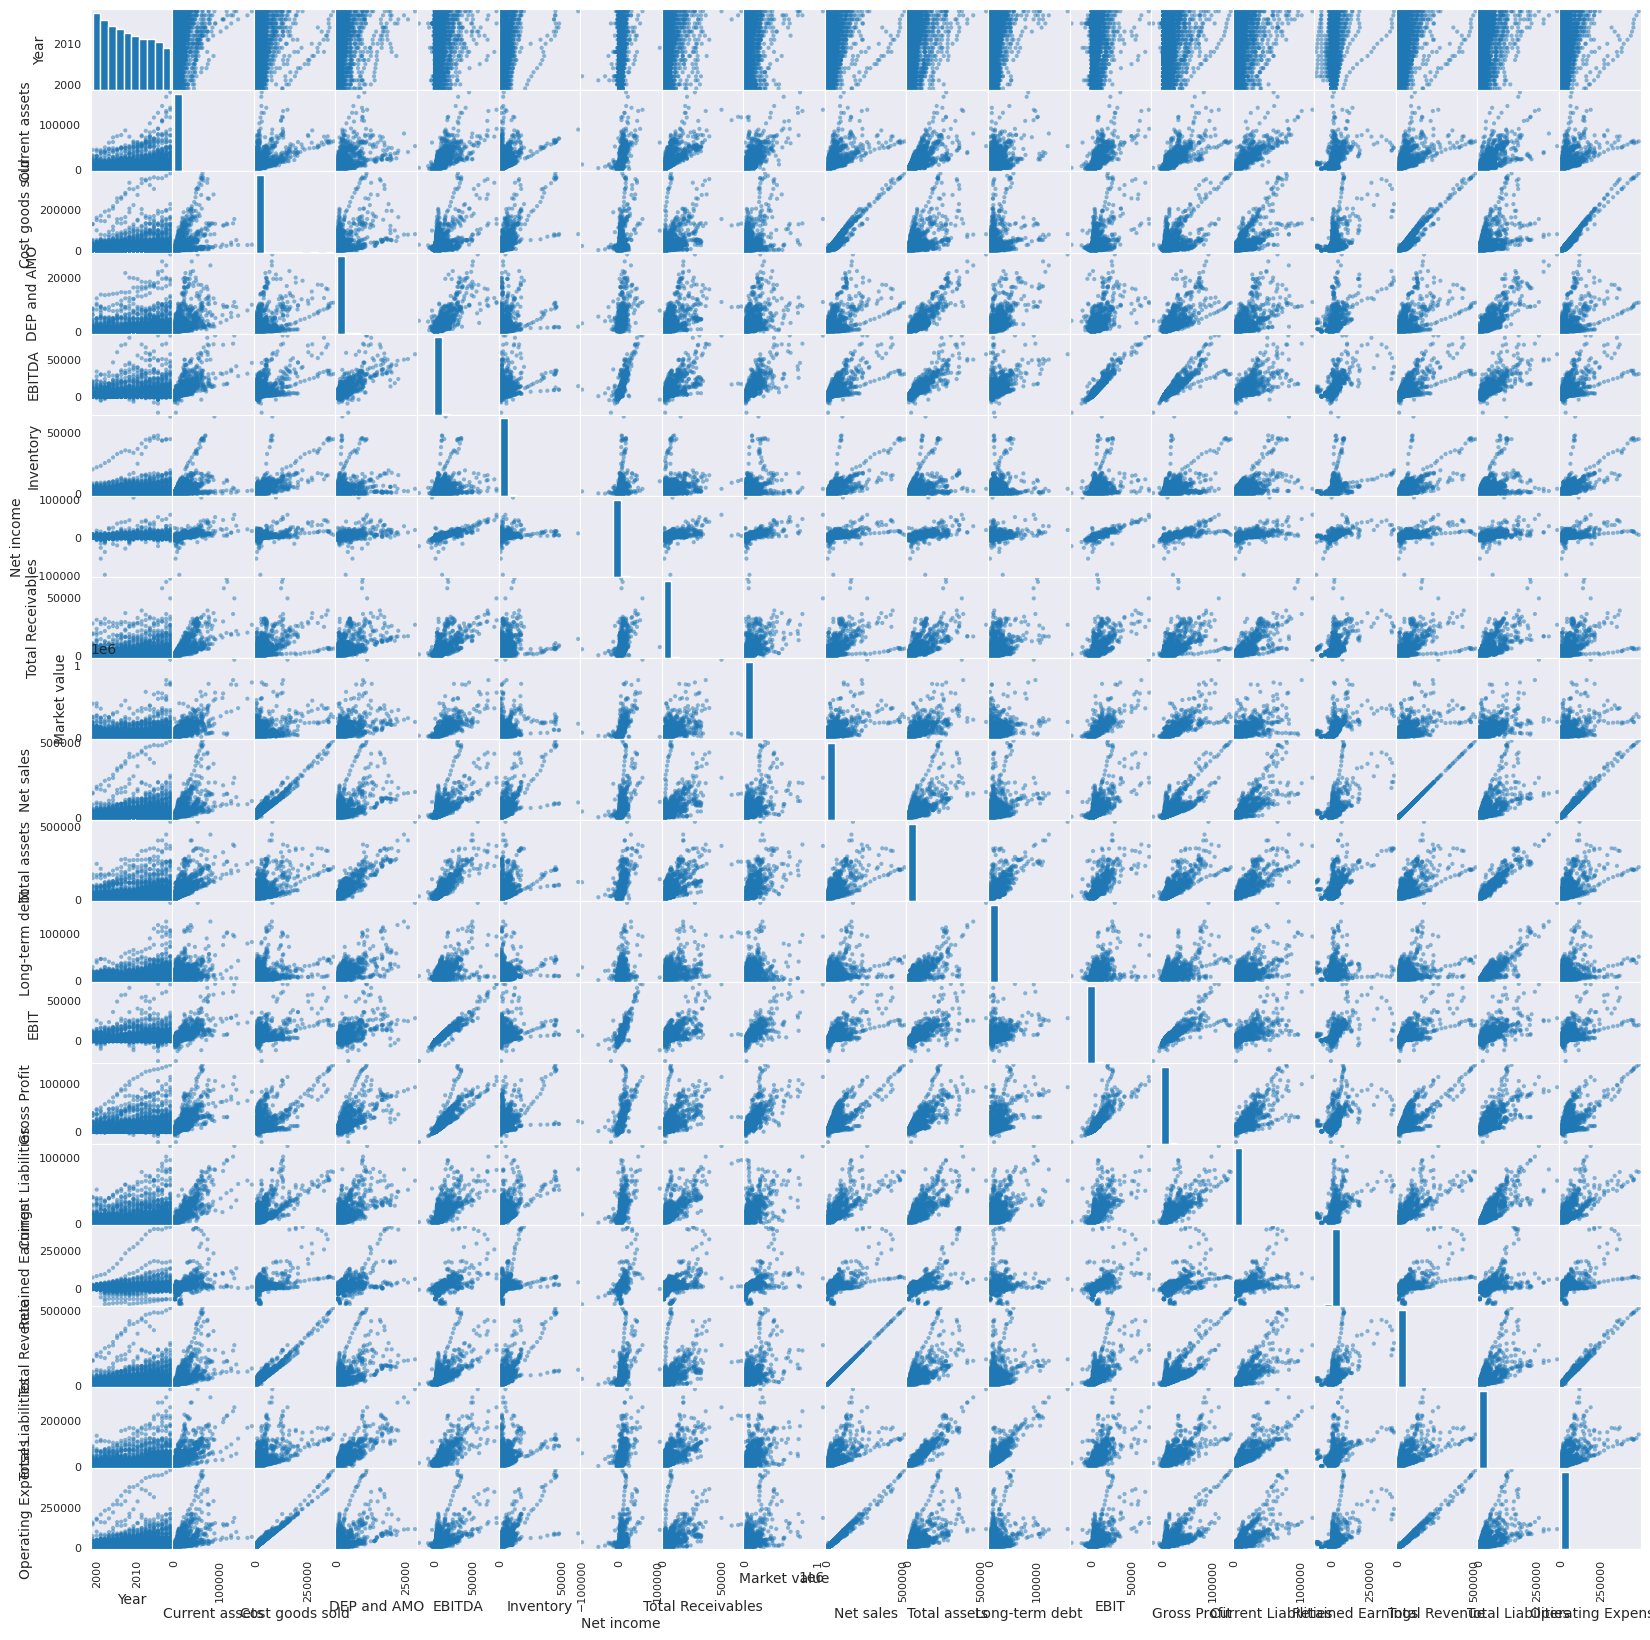

In [7]:
pd.plotting.scatter_matrix(df, figsize=(20,20))

### Correlation matrix

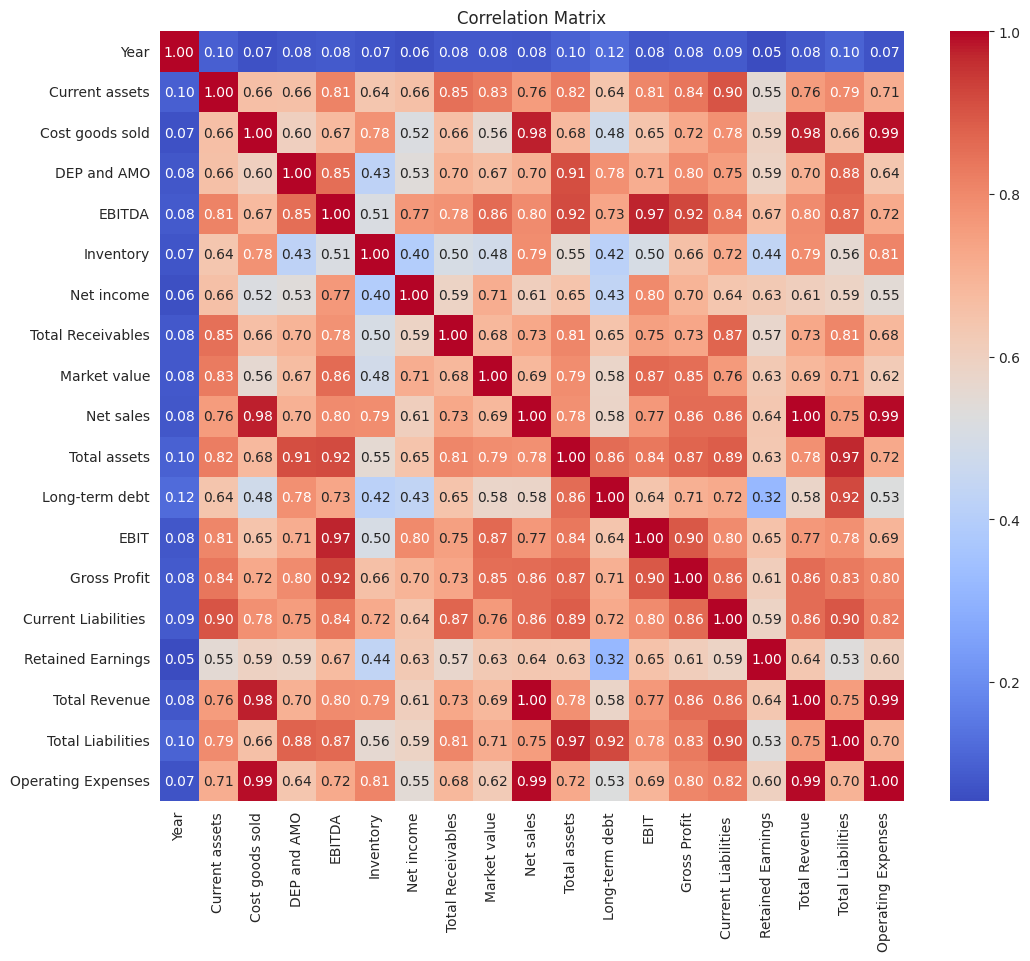

In [8]:
non_numeric_columns = df.select_dtypes(exclude='number').columns
df_numeric_columns = df.drop(columns=non_numeric_columns)
correlation_matrix = df_numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Dataset transformation
Currently, the dataset contains multiple entries for the same company. Every one of these rows is from a different year. Since we are trying to predict a company's outcome based on their financial history, we are going to transform the dataset so that one row has all the information about one company, using information from the 3 latest years.

## DROP < 3 ocurrences

In [21]:
df["Company name"].value_counts().value_counts().sort_index()

# drop de companies with less than 4 entries
df = df[df["Company name"].map(df["Company name"].value_counts()) >= 3]

df["Company name"].value_counts().value_counts().sort_index()


count
3      756
4      681
5      616
6      573
7      497
8      427
9      402
10     265
11     290
12     295
13     240
14     194
15     186
16     168
17     148
18     158
19     242
20    1172
Name: count, dtype: int64

## Quedarnos amb els tres ultims anys de cada empresa i triplicar les columnes una per cada any
    El Year de l'empresa es el menys recent dels tres

In [13]:
# Ordenar per empresa i any i agafar els 3 anys més recents de cada empresa
df = df.sort_values(["Company name", "Year"])
df = df.groupby("Company name").tail(3)

# Llista per les noves files
noves_files = []

# Agrupar el dataframe por cada 3 filas (cada empresa)
num_ocurrencies_per_empresa = 3
num_columnes_original = len(df.columns)
num_columnas_nuevo = num_columnes_original * num_ocurrencies_per_empresa

# Guardo en noves_files una llista on cada element es una fila dels 3 anys d'una empresa
for i in range(0, len(df), num_ocurrencies_per_empresa):
    grup = df.iloc[i:i + num_ocurrencies_per_empresa]
    fila_nova = []
    
    for _, fila in grup.iterrows():
        fila_nova.extend(fila)
    
    noves_files.append(fila_nova)

# Crear les columnes noves
noves_columnes = []
for j in range(num_ocurrencies_per_empresa):
    for col in df.columns:
        noves_columnes.append(f'{col}_{j+1}')

# Crear el nou dataframe
df_preprocessat = pd.DataFrame(noves_files, columns=noves_columnes)

# Eliminar les columnes que no volem
df_preprocessat = df_preprocessat.drop(columns=['Year_2', 'Year_3', 'Status_2', 'Status_3', 'Company name_2', 'Company name_3'])

# Ordenar per any per tenir algun criteri de visualització
df_preprocessat = df_preprocessat.sort_values('Year_1')

df_preprocessat.to_csv('dades_preprocessades.csv', index=False)
